In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [13]:
# Load data
csv_data = './data/DailyDelhiClimateTrain.csv'
df = pd.read_csv(csv_data, delimiter=',')
df.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

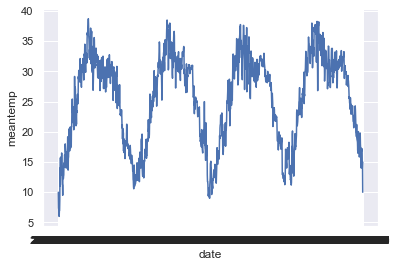

In [14]:
# Plot "meantemp" and "date"
sns.set_theme(style="darkgrid")
sns.lineplot(x="date", y="meantemp",data=df)
plt.show()

# Date-related features

In [15]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

df['year']=df['date'].dt.year 
df['month']=df['date'].dt.month 
df['day']=df['date'].dt.day

df.head()

date   meantemp   humidity  wind_speed  meanpressure  year  month  day
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1    1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1    2
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1    3
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1    4
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1    5

# Lag

In [16]:
df['lag_1'] = df['meantemp'].shift(1)
df = df[['date', 'lag_1', 'meantemp']]
df.head()

date      lag_1   meantemp
0 2013-01-01        NaN  10.000000
1 2013-01-02  10.000000   7.400000
2 2013-01-03   7.400000   7.166667
3 2013-01-04   7.166667   8.666667
4 2013-01-05   8.666667   6.000000

# Lag Aggregation

In [27]:
# Load data
csv_data = './data/DailyDelhiClimateTrain.csv'
df = pd.read_csv(csv_data, delimiter=',')

df['lag_1'] = df['meantemp'].shift(1)
df['lag_2'] = df['meantemp'].shift(2)
df['lag_3'] = df['meantemp'].shift(3)
df['lag_4'] = df['meantemp'].shift(4)
df['lag_5'] = df['meantemp'].shift(5)


# Aggregation
lagged_feature_cols = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']
# Create df_lagged_features to use for aggregation calculations
df_lagged_features = df_lagged.loc[:, lagged_feature_cols]
# Create aggregated features
df['max'] = df_lagged_features.aggregate(np.max, axis=1)
df['min'] = df_lagged_features.aggregate(np.min, axis=1)
df['mean'] = df_lagged_features.aggregate(np.mean, axis=1)
df['Standard Deviation'] = df_lagged_features.aggregate(np.std, axis=1)
# Drop first 5 rows due to NaNs
df = df.iloc[5: , :]

df.head(10)


date   meantemp   humidity  wind_speed  meanpressure      lag_1  \
5   2013-01-06   7.000000  82.800000    1.480000   1018.000000   6.000000   
6   2013-01-07   7.000000  78.600000    6.300000   1020.000000   7.000000   
7   2013-01-08   8.857143  63.714286    7.142857   1018.714286   7.000000   
8   2013-01-09  14.000000  51.250000   12.500000   1017.000000   8.857143   
9   2013-01-10  11.000000  62.000000    7.400000   1015.666667  14.000000   
10  2013-01-11  15.714286  51.285714   10.571429   1016.142857  11.000000   
11  2013-01-12  14.000000  74.000000   13.228571   1015.571429  15.714286   
12  2013-01-13  15.833333  75.166667    4.633333   1013.333333  14.000000   
13  2013-01-14  12.833333  88.166667    0.616667   1015.166667  15.833333   
14  2013-01-15  14.714286  71.857143    0.528571   1015.857143  12.833333   

        lag_2      lag_3      lag_4      lag_5        max        min  \
5    8.666667   7.166667   7.400000  10.000000  10.000000   6.000000   
6    6.000000   8.666667   7.166667   7.400000   8.666667   6.000000   
7    7.000000   6.000000   8.666667   7.166667   8.666667   6.000000   
8    7.000000   7.000000   6.000000   8.666667   8.857143   6.000000   
9    8.857143   7.000000   7.000000   6.000000  14.000000   6.000000   
10  14.000000   8.857143   7.000000   7.000000  14.000000   7.000000   
11  11.000000  14.000000   8.857143   7.000000  15.714286   7.000000   
12  15.714286  11.000000  14.000000   8.857143  15.714286   8.857143   
13  14.000000  15.714286  11.000000  14.000000  15.833333  11.000000   
14  15.833333  14.000000  15.714286  11.000000  15.833333  11.000000   

         mean  Standard Deviation  
5    7.846667            1.531448  
6    7.246667            0.956731  
7    7.166667            0.957427  
8    7.504762            1.219922  
9    8.571429            3.205544  
10   9.571429            2.974380  
11  11.314286            3.581984  
12  12.714286            2.744196  
13  14.109524            1.951916  
14  13.876190            2.036195

/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


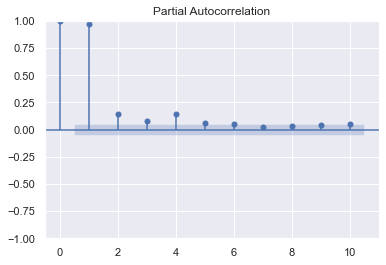

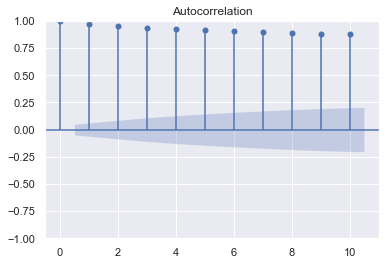

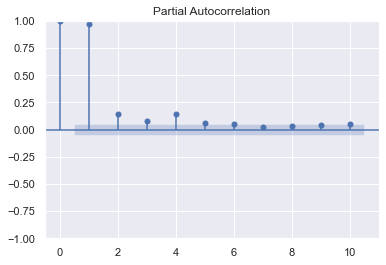

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['meantemp'], lags=10)
plot_pacf(df['meantemp'], lags=10)

# Rolling Window

In [8]:
df['rolling_window_mean'] = df['meantemp'].rolling(window=7).mean()
df = df[['date', 'rolling_window_mean', 'meantemp']]
df.head(20)

date  rolling_window_mean   meantemp
0  2013-01-01                  NaN  10.000000
1  2013-01-02                  NaN   7.400000
2  2013-01-03                  NaN   7.166667
3  2013-01-04                  NaN   8.666667
4  2013-01-05                  NaN   6.000000
5  2013-01-06                  NaN   7.000000
6  2013-01-07             7.604762   7.000000
7  2013-01-08             7.441497   8.857143
8  2013-01-09             8.384354  14.000000
9  2013-01-10             8.931973  11.000000
10 2013-01-11             9.938776  15.714286
11 2013-01-12            11.081633  14.000000
12 2013-01-13            12.343537  15.833333
13 2013-01-14            13.176871  12.833333
14 2013-01-15            14.013605  14.714286
15 2013-01-16            13.989796  13.833333
16 2013-01-17            14.775510  16.500000
17 2013-01-18            14.506803  13.833333
18 2013-01-19            14.292517  12.500000
19 2013-01-20            13.642857  11.285714

# Expending Window Feature

In [9]:
# Load data
csv_data = './data/DailyDelhiClimateTrain.csv'
df = pd.read_csv(csv_data, delimiter=',')
df.head()

df['expanding_mean'] = df['meantemp'].expanding(7).mean()
df = df[['date','meantemp', 'expanding_mean']]
df.head(20)

date   meantemp  expanding_mean
0   2013-01-01  10.000000             NaN
1   2013-01-02   7.400000             NaN
2   2013-01-03   7.166667             NaN
3   2013-01-04   8.666667             NaN
4   2013-01-05   6.000000             NaN
5   2013-01-06   7.000000             NaN
6   2013-01-07   7.000000        7.604762
7   2013-01-08   8.857143        7.761310
8   2013-01-09  14.000000        8.454497
9   2013-01-10  11.000000        8.709048
10  2013-01-11  15.714286        9.345887
11  2013-01-12  14.000000        9.733730
12  2013-01-13  15.833333       10.202930
13  2013-01-14  12.833333       10.390816
14  2013-01-15  14.714286       10.679048
15  2013-01-16  13.833333       10.876190
16  2013-01-17  16.500000       11.207003
17  2013-01-18  13.833333       11.352910
18  2013-01-19  12.500000       11.413283
19  2013-01-20  11.285714       11.406905

# Seasonal differencing

In [41]:
# Load data
csv_data = './data/DailyDelhiClimateTrain.csv'
df = pd.read_csv(csv_data, delimiter=',')

# 1 month difference
df['1month_diff'] = df['meantemp'].diff(periods=1)

# 24 months difference
df['24month_diff'] = df['meantemp'].diff(periods=24)

df.head(10)

date   meantemp   humidity  wind_speed  meanpressure  1month_diff  \
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667          NaN   
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000    -2.600000   
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667    -0.233333   
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667     1.500000   
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000    -2.666667   
5  2013-01-06   7.000000  82.800000    1.480000   1018.000000     1.000000   
6  2013-01-07   7.000000  78.600000    6.300000   1020.000000     0.000000   
7  2013-01-08   8.857143  63.714286    7.142857   1018.714286     1.857143   
8  2013-01-09  14.000000  51.250000   12.500000   1017.000000     5.142857   
9  2013-01-10  11.000000  62.000000    7.400000   1015.666667    -3.000000   

   24month_diff  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7           NaN  
8           NaN  
9           NaN

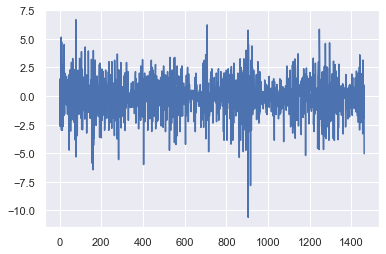

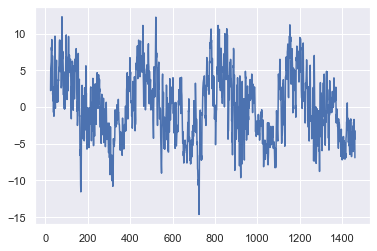

In [43]:
df['1month_diff'] = df['meantemp'].diff(periods=1)
plt.plot(df['1month_diff'])
plt.show()

df['24month_diff'] = df['meantemp'].diff(periods=24)
plt.plot(df['24month_diff'])
plt.show()



# Transformation

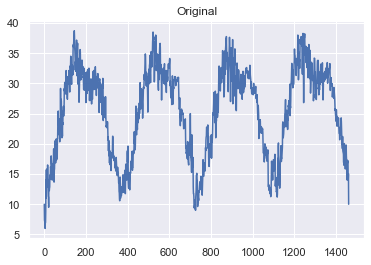

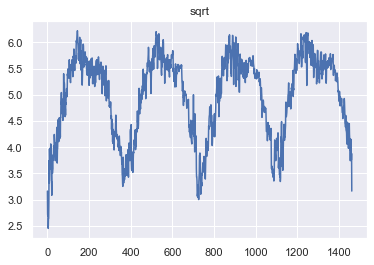

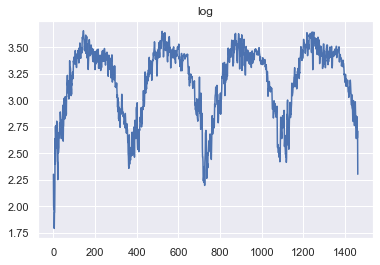

In [46]:
# Load data
csv_data = './data/DailyDelhiClimateTrain.csv'
df = pd.read_csv(csv_data, delimiter=',')


plt.plot(df['meantemp'])
plt.title("Original")
plt.show()

df['sqrt'] = np.sqrt(df['meantemp'])
plt.plot(df['sqrt'])
plt.title("sqrt")
plt.show()


df['log'] = np.log(df['meantemp'])
plt.plot(df['log'])
plt.title("log")
plt.show()

